<a href="https://colab.research.google.com/github/dawoomjung/dawoomjung/blob/main/Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import requests

In [9]:
from bs4 import BeautifulSoup

In [ ]:
soup = BeautifulSoup(html_string)
article = soup.get_text() #pulling the text in variable called article and applying get text function to that
print(article)

In [2]:
import pandas as pd

In [3]:
data_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/January 2016 test.csv")

In [ ]:
data_df

In [5]:
data_df.dtypes

Title    object
URL      object
dtype: object

In [10]:
def scrape_article(url):
    response = requests.get(url)
    response.encoding = 'utf-8'
    html_string = response.text
    return html_string

In [11]:
data_df ['text'] = data_df ['URL'].apply(scrape_article)

In [ ]:
data_df


In [ ]:
for text in data_df ['text']:
  soup = BeautifulSoup(text)
  article = soup.get_text()
  print(article)


In [ ]:
%config ZMQInteractiveShell.ast_node_interactivity='all'
%config NotebookApp.iopub_data_rate_limit=1000000000.0

In [253]:
with open("all_articles.txt","w") as file:
    for text in data_df['text']:
        soup = BeautifulSoup(text)
        article = soup.get_text()
        file.write(article)

In [254]:
! mkdir files

mkdir: cannot create directory ‘files’: File exists


In [255]:
id = 0
for text in data_df['text']:
    soup = BeautifulSoup(text)
    article = soup.get_text()

    id += 1
    with open(f"files/article_{id}.txt", "w") as file:
        file.write(str(article))

In [18]:
! cd files

In [256]:
! ls

all_articles.txt  dectest_cleaned  drive  files  files_cleaned	sample_data  wordclouds


In [257]:
import nltk
import matplotlib
%matplotlib inline

In [ ]:
nltk.download("book")

In [ ]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.stem.wordnet import WordNetLemmatizer

from wordcloud import WordCloud
import matplotlib.pyplot as plt

import glob

In [395]:
custom_stop_words = "medium affair dprkpyongyang player time institute agriculture agricultural secretary KCNA kcna watch 2023pyongyang december kr drpk today article friendly interface archive rodong sinmun sign date Source Read original version more from KCNA pyongyang en archivedprk archivekfpd archiverodong email archivekass ka archivenaenara archivetongil kfpd nk north naenara uriminzokkiri english medium Medium title create site meari voice dprk korea kim il sung kim jong un 20 2023 pro user view medium home database pdfs news title arirang ka ka tongil shinbo voiceuriminzokkiri please use different web browser internet explorer compatible website instead recommend use chrome edge firefox safari support internet explorer microsoft cease support ie 10 old 2016 addition microsoft chief chris jackson urge user stop use browser since february 2019 watch medium learn enter detail address password protect recaptcha google privacy policy term service apply submit forgot password account watch medium learn forgot password please enter username address receive link new password via address protect recaptcha google privacy policy term service apply send account get daily update start day story matter select address archivechongnyon chonwi archivegrand archivekim university archiveministry archiveminju archivepyongyang time archiveryomyong archiveryugyong archivesports archiveuriminzokkiri archivevoice see article article set alert notify whenever article publish korean keywords source size mention indexwhat official medium output update real time due regular server outage multiple occasion mirror easy access browsing full copy article also host due government regular deletion edit archive material realtime social medium permalinks cite academic journal find view contact faq term condition content kcnawatch host educational access purpose material copyright government specialist analysis research tool unique data set use support cease support old urge user use watch medium detail protect term watch medium protect term story select correspondence complete 21 general secretary Worker Party president State Affairs Press statement: Vice Department Director WPK Pyongyang 21 Vice Department Director Central Committee Worker Party Player back home Pyongyang take part IWF Grand Prix bag 26 gold Tanchon Smeltery marks 50th founding anniversary Pyongyang Tanchon Smeltery marked 50th founding anniversary love people One 47 1958 President visits Onchon County general shop looks around 2023 One 47 1958 President visits Onchon County general shop looks around Agricultural Manager Training School built Pyongyang Agricultural Manager Training School built South Hwanghae Province Fertilizer production DPRK Namhung Youth Chemical visit sport chongnyon sinbo family affair held city house agriculture Complex boosts fertilizer production Thanks Namhung Youth Chemical Complex boosts fertilizer production Chairman remembers Chinese Pyongyang General Association Chinese GAKC holds memorial service Chairman Jongnew Bus Stop creates care respect comrade One 103 2014 respect general secretary visits shooting 2023 One 103 2014 respect general secretary visits shooting Foreign personage visits mission Pyongyang foreign personage visits mission country occasion 12th Chairman remembers Chinese General Association Chinese Chongryon holds memorial event The Forest Science Institute inaugurated South Hwanghae Province DPRK Pyongyang Forest Science Institute newly built South Hwanghae Province Institute Farm preparation next year brisk Agricultural official worker Hamgyong Province turns making Multiple rocket launcher presents students Pyongyang University College Students prepared conducive beef Chairman remembers Chinese Pyongyang talks family related struggle Talks family related struggle took Moving house DPRK house style 240 family built Paesan Vegetable Review Sinmun Pyongyang follow major item article lead newspaper on speech representative open meeting UNSC Pyongyang representative Democratic People's Republic makes a press review Pyongyang 19 follow major item article lead newspaper Tuesday Songrim City Foodstuff Factory built DPRK Pyongyang 19 Songrim City Foodstuff Factory newly built Hwanghae Province amid browse"

In [396]:
custom_stop_words = word_tokenize(custom_stop_words)


In [397]:
stop_words = set(stopwords.words('english'))
stop_words.update(custom_stop_words)

In [398]:
stop_words.update("hwanghae province")
stop_words.update("ministry affair")
stop_words.update("affair ministry")
stop_words.update("item article")
stop_words.update("follow item")
stop_words.update("public health")
stop_words.update("minju josun")

In [399]:
stop_words.update(["south", "hwanghae", "province", "ministry", "affair affair", "item" , "article", "follow","public", "health","minju","josun","choson","affair","worker","party", "chongyon","grand","foodstuff","factory" ])

In [400]:
! mkdir dectest_cleaned

mkdir: cannot create directory ‘dectest_cleaned’: File exists


In [401]:
! mkdir wordclouds

mkdir: cannot create directory ‘wordclouds’: File exists


In [402]:
directory = "files"
files = glob.glob(f"{directory}/*.txt")

In [403]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [404]:
for filepath in files:
    text = open(filepath, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    text_punct = [word for word in text_tokens if word.isalnum()]
    nltk_text = nltk.Text(text_punct)
    text_lower = [t.lower() for t in nltk_text if t.isalnum()]
    text_stops = [t for t in text_lower if t not in stop_words]
    text_clean = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops]


In [405]:
combined_text = ' '.join(text_clean)

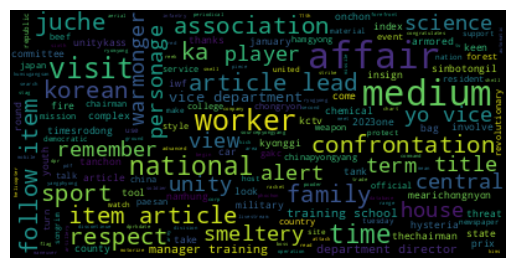

In [408]:
# create Word Clouds
wordcloud = WordCloud(max_font_size=30).generate(combined_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [352]:
control_df= pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Dec 2023 Control Grop.csv")

In [353]:
def scrape_article(url):
    response = requests.get(url)
    response.encoding = 'utf-8'
    html_string = response.text
    return html_string

In [354]:
control_df ['text'] = control_df ['URL'].apply(scrape_article)

In [ ]:
control_df

In [ ]:
for text in control_df ['text']:
  soup = BeautifulSoup(text)
  control_article = soup.get_text()
  print(control_article)

In [360]:
with open("all_controlarticles.txt","w") as file:
    for text in control_df['text']:
        soup = BeautifulSoup(text)
        control_article = soup.get_text()
        file.write(control_article)

In [412]:
 mkdir control_files

In [431]:
id = 0
for text in control_df['text']:
    soup = BeautifulSoup(text)
    control_article = soup.get_text()

    id += 1
    with open(f"control_files/control_article_{id}.txt", "w") as file:
        file.write(str(control_article))

In [432]:
! cd control_files

In [433]:
! ls

all_articles.txt	 control_files	  drive  files_cleaned	wordclouds
all_controlarticles.txt  dectest_cleaned  files  sample_data


In [434]:
control_stop_words = "medium affair dprkpyongyang player time KCNA kcna watch 2023pyongyang december kr drpk today article friendly interface archive rodong sinmun sign date Source Read original version more from KCNA pyongyang en archivedprk archivekfpd archiverodong email archivekass ka archivenaenara archivetongil kfpd nk north naenara uriminzokkiri english medium Medium title create site meari voice dprk korea kim il sung kim jong un 20 2023 pro pro user view medium home database pdfs news title arirang ka ka tongil shinbo voiceuriminzokkiri please use different web browser internet explorer compatible website instead recommend use chrome edge firefox safari support internet explorer microsoft cease support ie 10 old 2016 addition microsoft chief chris jackson urge user stop use browser since february 2019 watch medium learn enter detail address password protect recaptcha google privacy policy term service apply submit forgot password account watch medium learn forgot password please enter username address receive link new password via address protect recaptcha google privacy policy term service apply send account get daily update start day story matter select address archivechongnyon chonwi archivegrand archivekim university archiveministry archiveminju archivepyongyang time archiveryomyong archiveryugyong archivesports archiveuriminzokkiri archivevoice see article article set alert notify whenever article publish korean keywords source size mention indexwhat official medium output update real time due regular server outage multiple occasion mirror easy access browsing full copy article also host due government regular deletion edit archive material realtime social medium permalinks cite academic journal find view contact faq term condition content kcnawatch host educational access purpose material copyright government specialist analysis research tool unique data set use support cease support old urge user use watch medium detail protect term watch medium protect term story select correspondence complete WPK Pyongyang 21 Player back home Pyongyang take part bag 26 marks 50th Pyongyang love people One 47 1958 President visits County general shop looks around 2023 One 47 1958 President visits Onchon County general shop looks around makes a press review Pyongyang 19 follow major item article lead newspaper Tuesday DPRK Pyongyang 19 browse"

In [435]:
control_stop_words = word_tokenize(control_stop_words)
stop_words = set(stopwords.words('english'))
stop_words.update(control_stop_words)

In [436]:
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

In [437]:
directory = "control_files"
control_files = glob.glob(f"{directory}/*.txt")

In [438]:
for filepath in control_files:
    text = open(filepath, encoding='utf-8').read()
    text_tokens = nltk.word_tokenize(text)
    text_punct = [word for word in text_tokens if word.isalnum()]
    nltk_text = nltk.Text(text_punct)
    text_lower = [t.lower() for t in nltk_text if t.isalnum()]
    text_stops = [t for t in text_lower if t not in stop_words]
    text_clean = [WordNetLemmatizer().lemmatize(t, get_wordnet_pos(t)) for t in text_stops]

In [439]:
print (text_clean)

['increase', 'production', 'metal', 'industry', 'view', 'medium', 'database', 'discontinue', 'title', 'chongnyon', 'chongnyon', 'grand', 'national', 'unity', 'ka', 'ka', 'ministry', 'foreign', 'affair', 'ministry', 'foreign', 'affair', 'minju', 'choson', 'minju', 'choson', 'time', 'time', 'pdf', 'ryugyong', 'ryomyong', 'sport', 'sport', 'sinbo', 'periodical', 'dpr', 'foreign', 'trade', 'kumsugangsan', 'time', 'sinbo', 'central', 'tv', 'kctv', 'livestream', 'kctv', 'tool', 'chart', 'kims', 'index', 'threat', 'index', 'alert', 'advanced', 'search', 'insign', 'view', 'medium', 'title', 'mearichongnyon', 'chongnyon', 'grand', 'national', 'unitykass', 'ka', 'ministry', 'foreign', 'affair', 'ministry', 'foreign', 'affair', 'ministry', 'public', 'health', 'ministry', 'public', 'health', 'minju', 'choson', 'minju', 'choson', 'timesrodong', 'sport', 'sinbotongil', 'title', 'mearichongnyon', 'chongnyon', 'grand', 'national', 'unitykass', 'ka', 'ministry', 'foreign', 'affair', 'ministry', 'foreig

In [440]:
combined_text = ' '.join(text_clean)

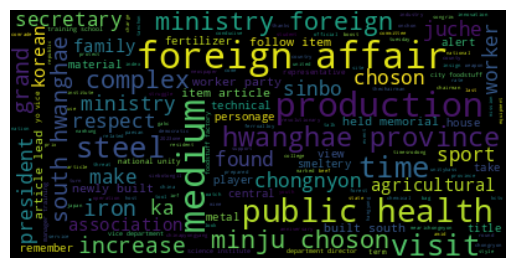

In [441]:
# create Word Clouds
wordcloud = WordCloud(max_font_size=30).generate(combined_text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()